In [ ]:
import pandas as pd

#importo il dataset 
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

In [ ]:
# verifico dimensioni e metadati
print(df.shape)
print(df.info())
print(df.head())

In [ ]:
# Rimuovo le locazioni senza continente
df = df[df['continent'].notna()]

In [4]:
# Calcolo il numero di casi totali per continente
cases_per_continent = df.groupby('continent')['total_cases'].sum().reset_index()
print(cases_per_continent)

       continent   total_cases
0         Africa  1.360475e+10
1           Asia  2.289547e+11
2         Europe  2.172971e+11
3  North America  1.175176e+11
4        Oceania  1.044462e+10
5  South America  6.819703e+10


In [28]:
# Definisco i nomi dei continenti da confrontare
continent1 = 'Europe'
continent2 = 'Asia'

In [38]:
def compare_continents(continent1, continent2):
    # Filtro i dati per i due continenti
    continent1_data = df[df['continent'] == continent1]
    continent2_data = df[df['continent'] == continent2]

In [39]:
# Calcolo i descrittori statistici
stats = {}
for continent, data in [(continent1, continent1_data), (continent2, continent2_data)]:
    max_cases = data['total_cases'].max()
    mean_cases = data['total_cases'].mean()
    percentage_cases = (data['total_cases'].sum() / df['total_cases'].sum()) * 100
    stats[continent] = {
        'max': max_cases,
        'mean': mean_cases,
        'percentage': percentage_cases
    }

return stats

NameError: name 'continent1_data' is not defined

In [33]:
# Chiamo la funzione con le variabili definite
stats_comparison = compare_continents(continent1, continent2)
print(stats_comparison)

None


In [34]:
# Filtrare i dati per l'Italia nel 2022
italy_2022 = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))]

Matplotlib is building the font cache; this may take a moment.


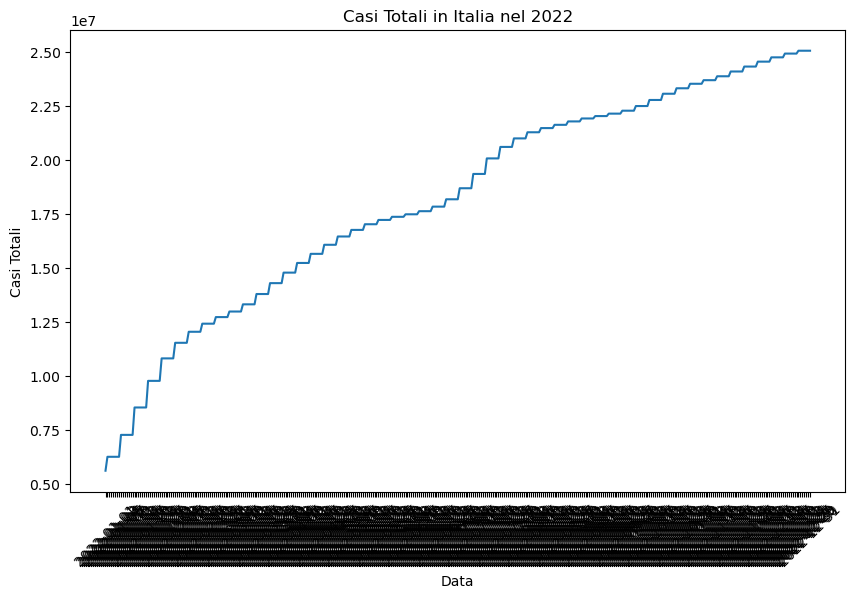

In [36]:
# Grafico dei casi totali rispetto alla data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(italy_2022['date'], italy_2022['total_cases'])
plt.title('Casi Totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.xticks(rotation=45)
plt.show()

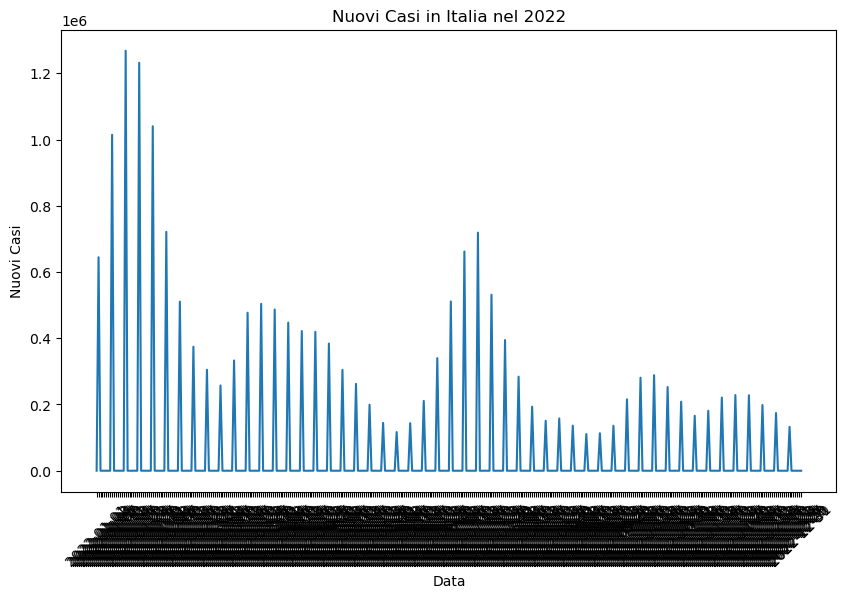

In [40]:
# Grafico dei nuovi casi rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(italy_2022['date'], italy_2022['new_cases'])
plt.title('Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.xticks(rotation=45)
plt.show()

C:\Users\fabio\AppData\Local\Temp\ipykernel_21044\672077818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_2022['cumulative_new_cases'] = italy_2022['new_cases'].cumsum()


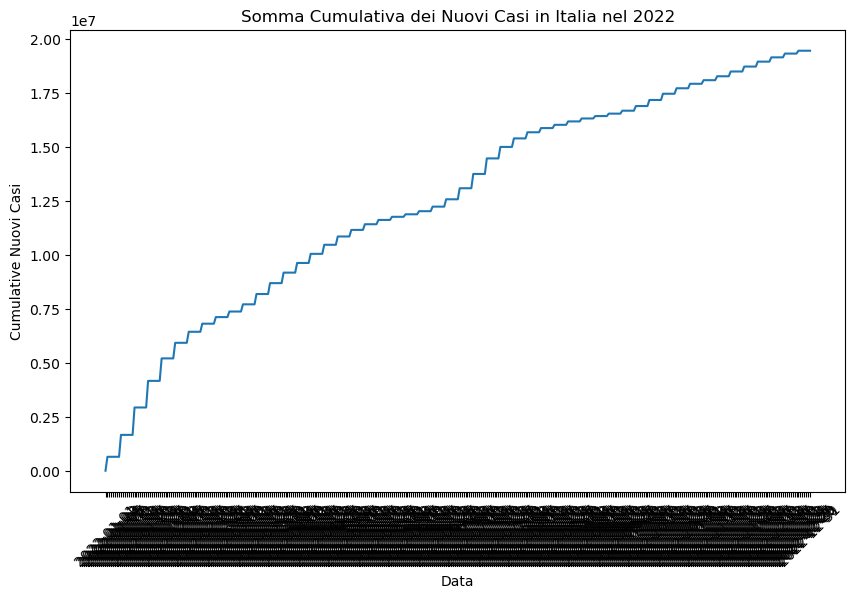

In [41]:
# Grafico della somma cumulativa dei nuovi casi
italy_2022['cumulative_new_cases'] = italy_2022['new_cases'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(italy_2022['date'], italy_2022['cumulative_new_cases'])
plt.title('Somma Cumulativa dei Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Cumulative Nuovi Casi')
plt.xticks(rotation=45)
plt.show()

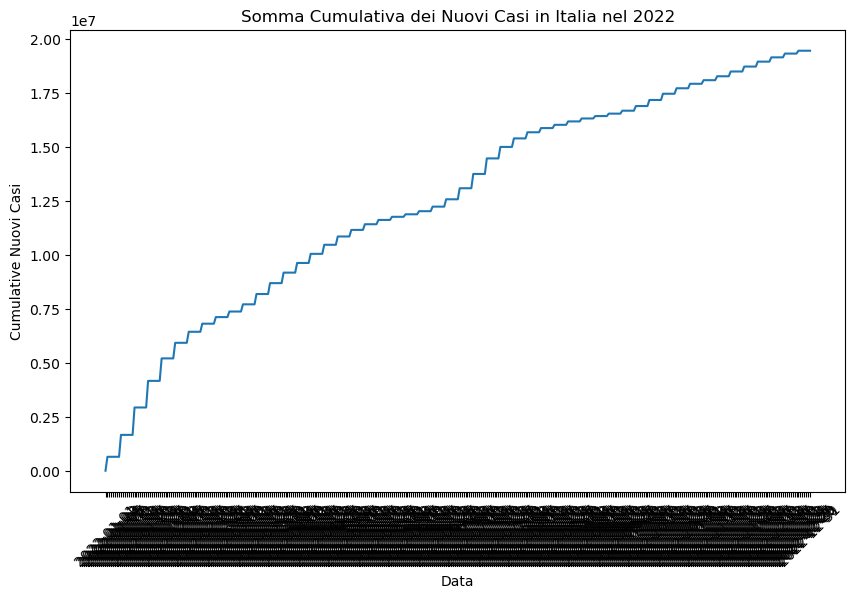

In [42]:
# Grafico della somma cumulativa dei nuovi casi
italy_2022.loc[:, 'cumulative_new_cases'] = italy_2022['new_cases'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(italy_2022['date'], italy_2022['cumulative_new_cases'])
plt.title('Somma Cumulativa dei Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Cumulative Nuovi Casi')
plt.xticks(rotation=45)
plt.show()

In [43]:
# Filtrare i dati da maggio 2022 ad aprile 2023
icu_data = df[(df['location'].isin(['Italy', 'Germany', 'France'])) & 
              (df['date'] >= '2022-05-01') & 
              (df['date'] <= '2023-04-30')]


<Figure size 1000x600 with 0 Axes>

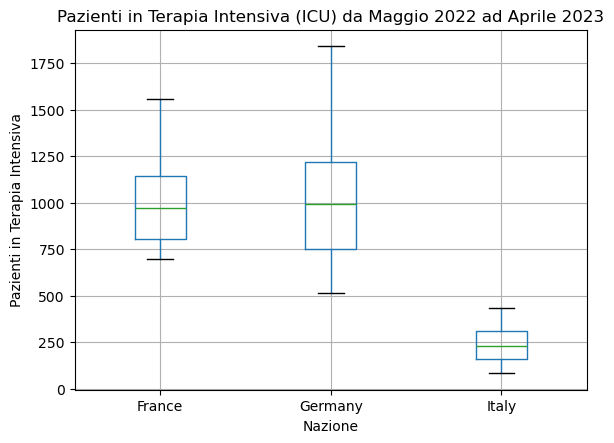

In [44]:
# Boxplot
plt.figure(figsize=(10, 6))
icu_data.boxplot(column='icu_patients', by='location')
plt.title('Pazienti in Terapia Intensiva (ICU) da Maggio 2022 ad Aprile 2023')
plt.suptitle('')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in Terapia Intensiva')
plt.show()

In [45]:
# Filtrare i dati per il 2023
hospital_data = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
                   (df['date'] >= '2023-01-01')]


In [46]:
# Gestione dei dati nulli: sostituzione con la mediana
hospital_data['hosp_patients'].fillna(hospital_data['hosp_patients'].median(), inplace=True)

C:\Users\fabio\AppData\Local\Temp\ipykernel_21044\3467154306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_data['hosp_patients'].fillna(hospital_data['hosp_patients'].median(), inplace=True)


In [47]:
hospital_data = hospital_data.copy()  #copia per evitare avviso 
hospital_data['hosp_patients'].fillna(hospital_data['hosp_patients'].median(), inplace=True)

In [48]:
# Calcolare la somma dei pazienti ospitalizzati per ciascuna nazione
hospital_sum = hospital_data.groupby('location')['hosp_patients'].sum().reset_index()
print(hospital_sum)

  location  hosp_patients
0   France      2400984.0
1  Germany      1239270.0
2    Italy      1420731.0
3    Spain      1196324.0
